### 1.0 Leitura e importação 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('https://query.data.world/s/jzwtbulr4ojqodlk45rmuvgrxfcgxo')

In [3]:
df = df.rename(columns = {
    'Sales Channel'	:'CANAL_VENDA',
    'OrderDate'	:'DATA_PEDIDO',
    'ShipDate' :'DATA_ENVIO',
    'DeliveryDate' :'DATA_ENTREGA',
    'ProcuredDate' :'DATA_ADQUIRIDA',
    '_StoreID' :'ID_LOJA',
    '_ProductID' :'ID_PRODUTO',
    'Order Quantity' :'QTD_PRODUTO',
    'Discount Applied' :'DESCONTO',
    'Unit Price' :'PRECO_UNICO',
    'Unit Cost' :'CUSTO_UNICO'
}
)

### 2.0 Tratamento de dados

In [4]:
df = df.drop(df[['OrderNumber','WarehouseCode','CurrencyCode','_SalesTeamID','_CustomerID']], axis=1)

In [5]:
df.isnull().sum()

CANAL_VENDA       0
DATA_ADQUIRIDA    0
DATA_PEDIDO       0
DATA_ENVIO        0
DATA_ENTREGA      0
ID_LOJA           0
ID_PRODUTO        0
QTD_PRODUTO       0
DESCONTO          0
PRECO_UNICO       0
CUSTO_UNICO       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CANAL_VENDA     7991 non-null   object        
 1   DATA_ADQUIRIDA  7991 non-null   datetime64[ns]
 2   DATA_PEDIDO     7991 non-null   datetime64[ns]
 3   DATA_ENVIO      7991 non-null   datetime64[ns]
 4   DATA_ENTREGA    7991 non-null   datetime64[ns]
 5   ID_LOJA         7991 non-null   int64         
 6   ID_PRODUTO      7991 non-null   int64         
 7   QTD_PRODUTO     7991 non-null   int64         
 8   DESCONTO        7991 non-null   float64       
 9   PRECO_UNICO     7991 non-null   float64       
 10  CUSTO_UNICO     7991 non-null   float64       
dtypes: datetime64[ns](4), float64(3), int64(3), object(1)
memory usage: 686.9+ KB


In [7]:
df.head()

,CANAL_VENDA,DATA_ADQUIRIDA,DATA_PEDIDO,DATA_ENVIO,DATA_ENTREGA,ID_LOJA,ID_PRODUTO,QTD_PRODUTO,DESCONTO,PRECO_UNICO,CUSTO_UNICO
0,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,12,5,0.075,1963.1,1001.181
1,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,27,3,0.075,3939.6,3348.660
2,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,16,1,0.050,1775.5,781.220
3,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,23,8,0.075,2324.9,1464.687
4,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,26,8,0.100,1822.4,1476.144


In [8]:
df.tail()

,CANAL_VENDA,DATA_ADQUIRIDA,DATA_PEDIDO,DATA_ENVIO,DATA_ENTREGA,ID_LOJA,ID_PRODUTO,QTD_PRODUTO,DESCONTO,PRECO_UNICO,CUSTO_UNICO
7986,In-Store,2020-09-26,2020-12-30,2021-01-07,2021-01-14,339,29,1,0.075,234.5,121.940
7987,Online,2020-09-26,2020-12-30,2021-01-02,2021-01-04,202,3,6,0.050,3202.6,1921.560
7988,Online,2020-09-26,2020-12-30,2021-01-23,2021-01-26,241,35,5,0.200,3825.7,2792.761
7989,Online,2020-09-26,2020-12-30,2021-01-20,2021-01-25,112,36,8,0.100,1072.0,804.000
7990,In-Store,2020-09-26,2020-12-30,2021-01-13,2021-01-19,237,43,5,0.075,2211.0,1370.820


### 3.0 Feature Enginnering

In [9]:
df['LUCRO_PRODUTO'] = df['PRECO_UNICO'] - df['CUSTO_UNICO']
df['INTERVALO_ENTREGA'] = df['DATA_ENTREGA'] - df['DATA_ENVIO']
df['VALOR_COMPRA'] = df['QTD_PRODUTO'] * df['PRECO_UNICO']
df['LUCRO_TOTAL'] = df['QTD_PRODUTO'] * df['LUCRO_PRODUTO']
df['SUPLLY_CHAIN'] = df['DATA_PEDIDO'] - df['DATA_ADQUIRIDA']

In [10]:
df[['LUCRO_PRODUTO', 'INTERVALO_ENTREGA', 'VALOR_COMPRA', 'LUCRO_TOTAL', 'SUPLLY_CHAIN']].head()

,LUCRO_PRODUTO,INTERVALO_ENTREGA,VALOR_COMPRA,LUCRO_TOTAL,SUPLLY_CHAIN
0,961.919,5 days,9815.5,4809.595,151 days
1,590.940,10 days,11818.8,1772.820,151 days
2,994.280,10 days,1775.5,994.280,151 days
3,860.213,5 days,18599.2,6881.704,151 days
4,346.256,10 days,14579.2,2770.048,51 days


In [12]:
df.head(12)

,CANAL_VENDA,DATA_ADQUIRIDA,DATA_PEDIDO,DATA_ENVIO,DATA_ENTREGA,ID_LOJA,ID_PRODUTO,QTD_PRODUTO,DESCONTO,PRECO_UNICO,CUSTO_UNICO,LUCRO_PRODUTO,INTERVALO_ENTREGA,VALOR_COMPRA,LUCRO_TOTAL,SUPLLY_CHAIN
0,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,12,5,0.075,1963.1,1001.181,961.919,5 days,9815.5,4809.595,151 days
1,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,27,3,0.075,3939.6,3348.660,590.940,10 days,11818.8,1772.820,151 days
2,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,16,1,0.050,1775.5,781.220,994.280,10 days,1775.5,994.280,151 days
3,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,23,8,0.075,2324.9,1464.687,860.213,5 days,18599.2,6881.704,151 days
4,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,26,8,0.100,1822.4,1476.144,346.256,10 days,14579.2,2770.048,51 days
5,Online,2017-12-31,2018-05-31,2018-06-08,2018-06-13,285,1,5,0.050,1038.5,446.555,591.945,5 days,5192.5,2959.725,151 days
6,In-Store,2017-12-31,2018-05-31,2018-06-08,2018-06-14,6,5,4,0.150,1192.6,536.670,655.930,6 days,4770.4,2623.720,151 days
7,In-Store,2018-04-10,2018-05-31,2018-06-26,2018-07-01,280,46,5,0.050,1815.7,1525.188,290.512,5 days,9078.5,1452.560,51 days
8,In-Store,2017-12-31,2018-06-01,2018-06-16,2018-06-21,299,47,4,0.300,3879.3,2211.201,1668.099,5 days,15517.2,6672.396,152 days
9,In-Store,2017-12-31,2018-06-01,2018-06-29,2018-07-01,261,13,8,0.050,1956.4,1212.968,743.432,2 days,15651.2,5947.456,152 days


### 4.0 Visualização de dados

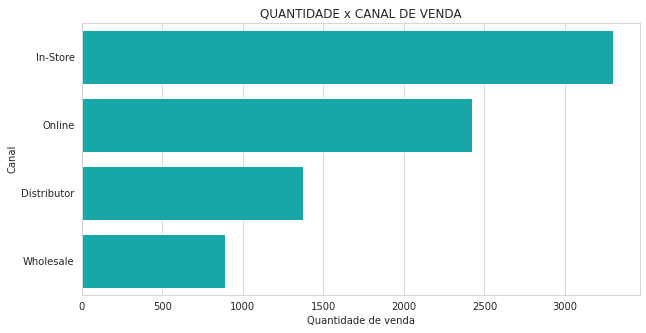

In [11]:
sn.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sn.countplot(y="CANAL_VENDA", data=df, color="c")
ax.set_title('QUANTIDADE x CANAL DE VENDA', fontsize=12)
ax.set_xlabel('Quantidade de venda', fontsize=10)
ax.set_ylabel('Canal', fontsize=10)
ax

In [103]:
ranking_lojas = df.groupby("ID_LOJA").agg({
    'QTD_PRODUTO':'sum',
    'PRECO_UNICO':'sum',
}).sort_values('QTD_PRODUTO',ascending = False).reset_index().rename(columns={'ID_LOJA':'LOJA',
                                                                                       'QTD_PRODUTO':'QUANTIDADE TOTAL DE PRODUTOS',
                                                                                       'PRECO_UNICO':'MONTANTE'}).head(15)
                                                                                    
ranking_lojas['TICKET_MEDIO'] = round(ranking_lojas['MONTANTE'] / ranking_lojas['QUANTIDADE TOTAL DE PRODUTOS'])
ranking_lojas                                                              

,LOJA,QUANTIDADE TOTAL DE PRODUTOS,MONTANTE,TICKET_MEDIO
0,284,182,90510.3,497.0
1,26,178,93940.7,528.0
2,166,174,67442.2,388.0
3,328,169,71596.2,424.0
4,128,162,57224.7,353.0
5,350,160,68989.9,431.0
6,17,160,70490.7,441.0
7,21,155,81090.1,523.0
8,41,155,49975.3,322.0
9,33,153,71911.1,470.0


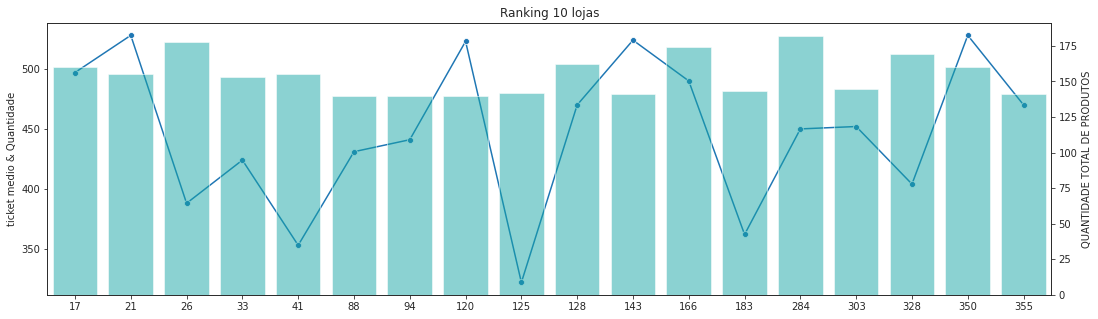

In [98]:

# Terminar...

ax1 = sn.set_style(style="ticks", rc=None )

fig, ax1 = plt.subplots(figsize=(18,5))

sn.lineplot(data = ranking_lojas['TICKET_MEDIO'], marker='o',ax=ax1, alpha=1.0)
ax2 = ax1.twinx()

sn.barplot(data = ranking_lojas, x='LOJA', y='QUANTIDADE TOTAL DE PRODUTOS', alpha=0.5, ax=ax2, color = "c")

ax2.set_title('Ranking 10 lojas', fontsize=12)
ax2.set_xlabel('Loja', fontsize=10)
ax1.set_ylabel('ticket medio & Quantidade', fontsize=10)
ax2
